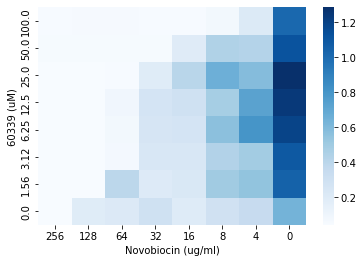

In [1]:
# Fig 1: Concentration dependent potentiation of NOV by NSC 60339
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_excel('Data_potentiation.xlsx', skiprows=range(0))
df = df.set_index('Compounds')
df = df.iloc [0:8, 0:12]
heat_map = sns.heatmap(df, cmap="Blues")

heat_map.set(xlabel='Novobiocin (ug/ml)', ylabel='60339 (uM)')
figure = heat_map.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

Text(0, 0.5, 'O.D. 600nm')

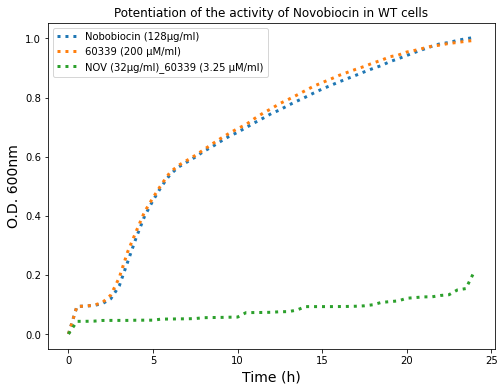

In [2]:
# Fig 2 (A): Growth curve analysis in the presence and absence of NOV and NSC 60339
import pandas as pd
 
# read by default 1st sheet of an excel file
df= pd.read_excel('WT_MIC_NOV_60339.xlsx')
#print(df)
x_data = df['Time [h]']
#x = list (df.loc[:,"pUC18-pBAD33"])
#y = list (df.loc[:,"Time [s]"])
y_data = df[df.columns[1::]]
#print (y_data)
z = list (df.iloc [:0, 1:12])

import matplotlib.pyplot as plt

#plt.plot(x_data,y_data, label= z)
plt.figure(figsize=(8,6))

plt.plot(x_data, y_data,
         linestyle = 'dotted',
         
         linewidth =3,
         markersize = 6,
         label = z)

plt.legend (loc = 'upper left', fontsize=10)

plt.title('Potentiation of the activity of Novobiocin in WT cells',fontsize=12)

plt.xlabel('Time (h)',fontsize=14)

plt.ylabel('O.D. 600nm',fontsize=14)
#plt.savefig("WT_MIC_NOV_60339.png", dpi = 300)

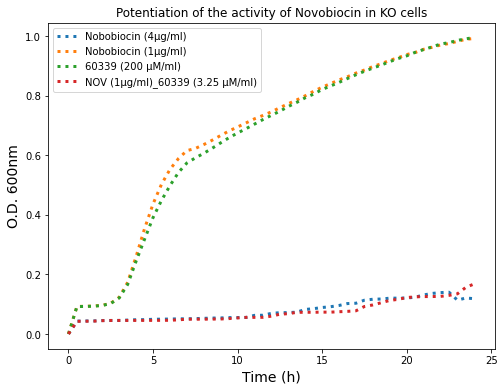

In [3]:
# Fig 2 (B) : Growth curve analysis in the presence and absence of NOV and NSC 60339
import pandas as pd
 
# read by default 1st sheet of an excel file
df= pd.read_excel('TolC_MIC_NOV_60339.xlsx')
#print(df)
x_data = df['Time [h]']
#x = list (df.loc[:,"pUC18-pBAD33"])
#y = list (df.loc[:,"Time [s]"])
y_data = df[df.columns[1::]]
#print (y_data)
z = list (df.iloc [:0, 1:12])

import matplotlib.pyplot as plt

#plt.plot(x_data,y_data, label= z)
plt.figure(figsize=(8,6))

plt.plot(x_data, y_data,
         linestyle = 'dotted',
         
         linewidth =3,
         markersize = 6,
         label = z)

plt.legend (loc = 'upper left', fontsize=10)

plt.title('Potentiation of the activity of Novobiocin in KO cells',fontsize=12)

plt.xlabel('Time (h)',fontsize=14)

plt.ylabel('O.D. 600nm',fontsize=14)
#plt.savefig("TolC_MIC_NOV_60339.png", dpi = 300)
plt.show() 

In [5]:
# Fig 3.1-2 : FIC index of WT strain
print ('Welcome!!! \nThank you to use our program to calculate the synergistic effect of two drugs:')
print ('\nPlease enter information:')

# MIC of first antibiotics
X= float(input("MIC of drug 1 alone:"))
# MIC of second antibiotic or compound
Y= float(input("MIC of drug 2 alone:"))
# MIC of antibiotic and compound combined
Z = float(input("MIC of drug 1 in combination therapy:"))
Q = float(input("MIC of drgu 2 in combination therapy:"))


#Calculate the fractional inhibitory concentration (FIC) index
# FIC of first antibiotics
FIC1 = Z / X
# FIC of second antibiotic or compound
FIC2 = Q / Y
# FIC of antibiotic and compound combined
FIC = FIC1 + FIC2
print ('\nResults:')

print (f'\t1.FIC index {FIC:.2f}')
if FIC <= 0.5:
    print ('\n\t2.Both drugs combindly have Synergistic effect. So, it is better to use them in combination')
elif FIC > 0.5 and FIC <= 1.5:
    print ('\n\t2.Both drugs combindly have Additive effect. So, it is sometimes better to use a single drug to avoid toxicity')
else:
    print ('\n\t2.Both drugs combindly have an Antagonistic effect. So, there is not point of using them in combination therapy')

# Journal reference for FIC index and scale: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2812160/


Welcome!!! 
Thank you to use our program to calculate the synergistic effect of two drugs:

Please enter information:


MIC of drug 1 alone: 256
MIC of drug 2 alone: 200
MIC of drug 1 in combination therapy: 32
MIC of drgu 2 in combination therapy: 2.56



Results:
	1.FIC index 0.14

	2.Both drugs combindly have Synergistic effect. So, it is better to use them in combination


In [6]:
# Fig 4: Pairwise alignment of two gene sequences
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

X = input (str ('Please enter the first DNA sequence'))
sequence1 = False
while not sequence1:
    sequence1 = True
    for i in range(len(X)):
        if X[i] not in "ATGCN":
            sequence1 = False
    if not sequence1:
        X=input("Your first input sequence is not a DNA sequence, pleae enter a valid DNA sequence:  ")
Y = input (str ('Please enter the second DNA sequence'))
sequence2 = False
while not sequence2:
    sequence2 = True
    for i in range(len(Y)):
        if Y[i] not in "ATGCN":
            sequence2 = False
    if not sequence2:
        Y=input("Your second input sequence is not a DNA sequence, pleae enter a valid DNA sequence:  ")
print("\t\nResults: \n")
print("\t1.Your both gene sequences are DNA sequences \n")


alignments = pairwise2.align.globalms(X, Y, 2, -1, -0.5, -0.1)

for a in alignments:
    print("\t2.Your pairwise alignment is:\n")
    print(format_alignment(*a))

#sequence examples
#ATGAACAAAAACAGAGGGTTTACGCCTCTGGCGGTCGTTCTGATGCTCTCAGGCAGCTTAGCCCTAACAGGATGTGACGACAAACA
#ATGAACAAAAACAGAGGGTTTACGCCTCTGGCGGTCGTTCTGATGCTCTCAGGCAGCTTTCACCTAACAGGATGTGACGACAAACA

from difflib import SequenceMatcher

def sequence_similarity (X, Y):
    return SequenceMatcher(None, X, Y).ratio()
print ('\n\t3.Two DNA sequences have', int (sequence_similarity (X,Y) * 100),'% sequence similarity')

print ('\n\t4.Sequence 1 information:')
total = len(X)
A = X.count("A")
T = X.count("T")
G = X.count("G")
C = X.count("C")

A_total = (A / total) * 100
T_total = (T / total) * 100
G_total = (G / total) * 100
C_total = (C / total) * 100

print (f'\t\t A = {A_total:.2f}''%')
print (f'\t\t T = {T_total:.2f}''%')
print (f'\t\t G = {G_total:.2f}''%')
print (f'\t\t C = {C_total:.2f}''%')

print ('\n\t5.Sequence 2 information:')

total = len(X)
A2 = Y.count("A")
T2 = Y.count("T")
G2 = Y.count("G")
C2 = Y.count("C")

A2_total = (A2 / total) * 100
T2_total = (T2 / total) * 100
G2_total = (G2 / total) * 100
C2_total = (C2 / total) * 100

print (f'\t\t A = {A2_total:.2f}''%')
print (f'\t\t T = {T2_total:.2f}''%')
print (f'\t\t G = {G2_total:.2f}''%')
print (f'\t\t C = {C2_total:.2f}''%')

total = len(X)
c = X.count("C")
g = X.count("G")

gc_total = g+c

gc_content = (gc_total/total) * 100

print (f'\n\t6.Total GC contents of sequence 1: {gc_content:.2f}''%')

total2 = len(Y)
d = Y.count("C")
e = Y.count("G")

gc_total2 = d+e

gc_content2 = (gc_total2/total2) * 100

print (f'\n\t7.Total GC contents of sequence 2: {gc_content2:.2f}''%')

Please enter the first DNA sequence ATGAACAAAAACAGAGGGTTTACGCCTCTGGCGGTCGTTCTGATGCTCTCAGGCAGCTTAGCCCTAACAGGATGTGACGACAAACA
Please enter the second DNA sequence ATGAACAAAAACAGAGGGTTTACGCCTCTGGCGGTCGTTCTGATGCTCTCAGGCAGCTTTCACCTAACAGGATGTGACGACAAACA


	
Results: 

	1.Your both gene sequences are DNA sequences 

	2.Your pairwise alignment is:

ATGAACAAAAACAGAGGGTTTACGCCTCTGGCGGTCGTTCTGATGCTCTCAGGCAGCTT--AGCCCTAACAGGATGTGACGACAAACA
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  |  ||||||||||||||||||||||||
ATGAACAAAAACAGAGGGTTTACGCCTCTGGCGGTCGTTCTGATGCTCTCAGGCAGCTTTCA--CCTAACAGGATGTGACGACAAACA
  Score=166.8


	3.Two DNA sequences have 97 % sequence similarity

	4.Sequence 1 information:
		 A = 29.07%
		 T = 20.93%
		 G = 25.58%
		 C = 24.42%

	5.Sequence 2 information:
		 A = 29.07%
		 T = 22.09%
		 G = 24.42%
		 C = 24.42%

	6.Total GC contents of sequence 1: 50.00%

	7.Total GC contents of sequence 2: 48.84%


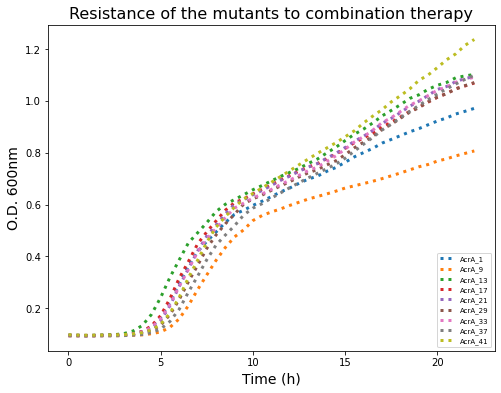

In [7]:
# Fig 5: Growth of AcrA mutants in the presence of potentiating concentration of NOV and NSC 60339
# import pandas lib as pd
import pandas as pd
 
# read by default 1st sheet of an excel file
df= pd.read_excel('growth_curve.xlsx')
x_data = df['Time [s]']
#x = list (df.loc[:,"pUC18-pBAD33"])
#y = list (df.loc[:,"Time [s]"])
y_data = df[df.columns[1::]]
#print (y_data)
z = list (df.iloc [:0, 1:12])

import matplotlib.pyplot as plt

#plt.plot(x_data,y_data, label= z)
plt.figure(figsize=(8,6))

plt.plot(x_data, y_data,
         linestyle = 'dotted',
         
         linewidth =3,
         markersize = 6,
         label = z)

plt.legend (loc = 'lower right', fontsize=7)

plt.title('Resistance of the mutants to combination therapy',fontsize=16)

plt.xlabel('Time (h)',fontsize=14)

plt.ylabel('O.D. 600nm',fontsize=14)
#plt.savefig("growth_curve_figure.png", dpi = 300)
plt.show() 

Coefficients: 
 [[0.52947253]]
MAE: 0.9191687945810021
MSE: 4.1913907886498825
RMSE: 2.047288643218118


C:\Users\anaconda_directory\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.10680818]])

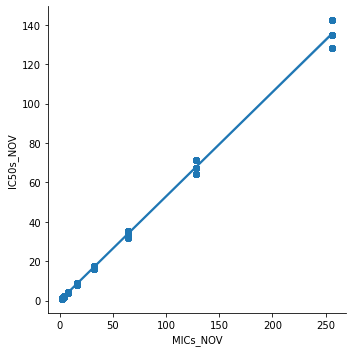

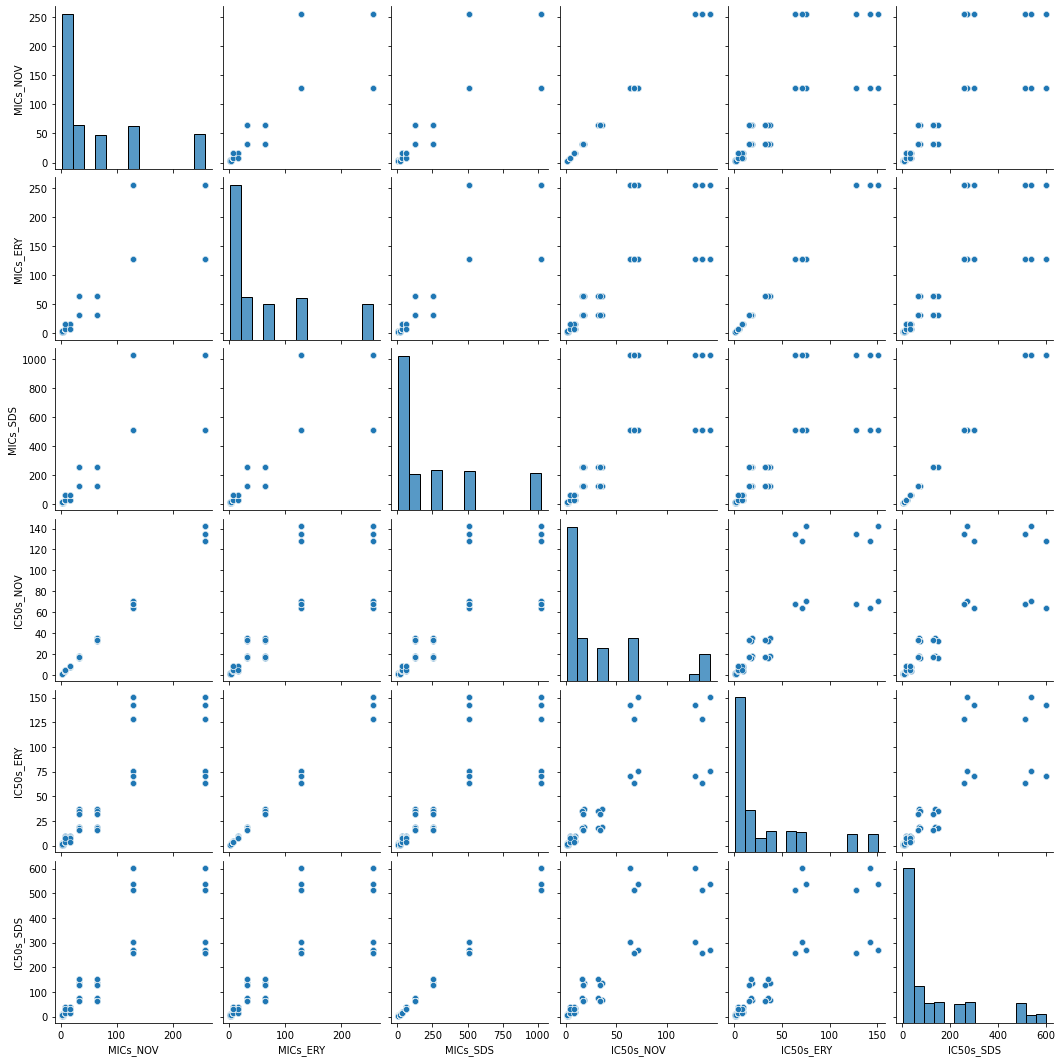

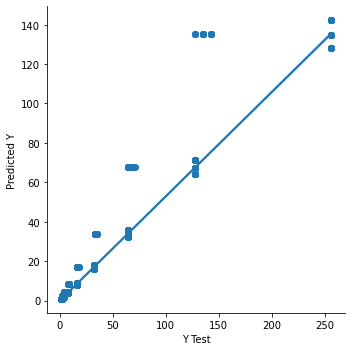

In [8]:
#Scatterplot of predicted Vs tested IC 50 values.

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = (10, 10)

dataset = pd.read_excel('IC50 dataset.xlsx')
dataset.sample(10)

dataset.columns

x = dataset.iloc[:, 1:2]
y = dataset.iloc[:,4:5]

#linear plot
sns.lmplot(x='MICs_NOV',y ='IC50s_NOV', data=dataset)

sns.pairplot(dataset)

#linear plot
sns.lmplot(x='MICs_NOV',y ='IC50s_NOV', data=dataset)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train,y_train)

# coefficient value.... 
print('Coefficients: \n', lm.coef_)

#prediction on test data
predictions = lm.predict(x_test)

#scatter plot on prediction
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# evaluating the model
#Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

# predict the value
lm.predict([[6]])
